# qgear

> paper link: https://arxiv.org/pdf/2504.03967

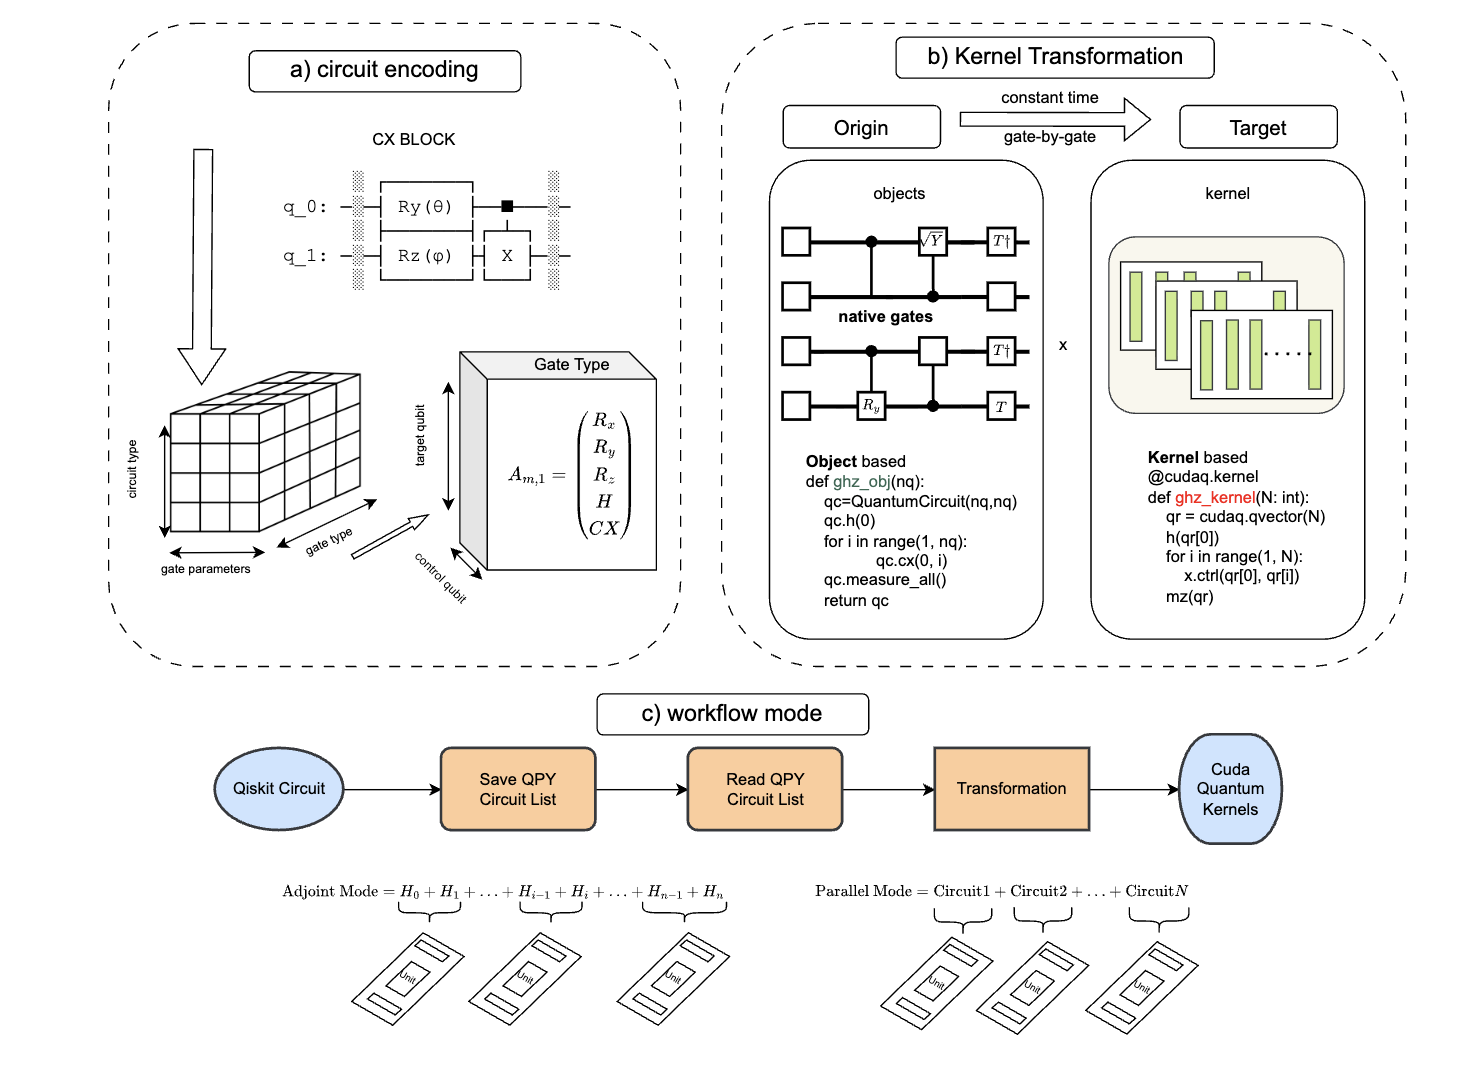

## local development

```sh
# make sure GRADIENT_IMAGE package is installed in development mode
$ pip3 install -e '.[dev]'

# compile to have changes apply to GRADIENT_IMAGE
$ nbdev_prepare
```